# Data Analysis of House Sales in King County USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on

## Downloading the Dataset

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/sumaya23abdul/house-sales-in-king-county-usa'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./house-sales-in-king-county-usa" (use force=True to force download)


The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './house-sales-in-king-county-usa'

In [ ]:
import os
os.listdir(data_dir)

['kc_house_data.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "house-sales-in-king-county" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shreyash-amrutam/house-sales-in-king-county" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shreyash-amrutam/house-sales-in-king-county


'https://jovian.com/shreyash-amrutam/house-sales-in-king-county'

## Importing Data Sets

**TODO** - Loading the CSV Files and extracting them for data modeling and cleaning.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
pd.read_csv(data_dir + "/kc_house_data.csv")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
data_raw_df = pd.read_csv(data_dir + "/kc_house_data.csv")

In [ ]:
data_raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data_raw_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
data_raw_df.shape

(21613, 21)

In [ ]:
data_raw_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
data_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data_raw_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shreyash-amrutam/house-sales-in-king-county" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shreyash-amrutam/house-sales-in-king-county


'https://jovian.com/shreyash-amrutam/house-sales-in-king-county'

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
>
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
print("Number of NaN values for the column bedrooms :", data_raw_df['bedrooms'].isnull().sum())
print("Number of NaN values for the column bathrooms :", data_raw_df['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms : 0
Number of NaN values for the column bathrooms : 0


In [ ]:
mean = data_raw_df['bedrooms'].mean()
data_raw_df['bedrooms'].replace(np.nan,mean, inplace=True)
mean = data_raw_df['bathrooms'].mean()
data_raw_df['bathrooms'].replace(np.nan,mean, inplace=True)
print("number of NaN values for the column bedrooms :", data_raw_df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", data_raw_df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shreyash-amrutam/house-sales-in-king-county" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shreyash-amrutam/house-sales-in-king-county


'https://jovian.com/shreyash-amrutam/house-sales-in-king-county'

## Exploratory Data Analysis
TODO - Using the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.



#### Q1: How many no. of houses are there in unique floor values by using method.to_frame

In [ ]:
a=data_raw_df.value_counts(["floors"])
a.to_frame()

,0
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


TODO - Using the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.

#### Q2: Determine and show the boxplot of whether the houses with a waterfront view or without have more price outliers

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='waterfront', ylabel='price'>

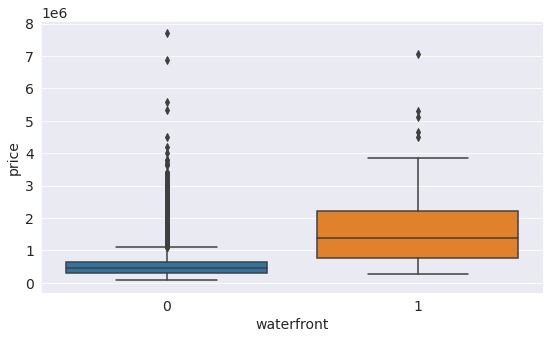

In [ ]:
x=data_raw_df["waterfront"]
y=data_raw_df["price"]
sns.boxplot(x,y,data=data_raw_df)

TODO - Using the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

#### Q3: Determine if the feature sqft_above is negatively or positively correlated with price

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

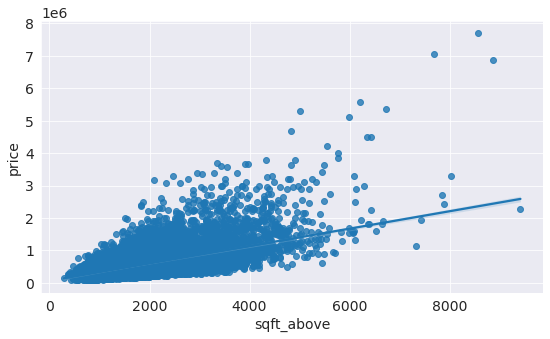

In [ ]:
x=data_raw_df['sqft_above']
y=data_raw_df['price']
sns.regplot(x,y,data=data_raw_df)

We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

In [ ]:
data_raw_df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shreyash-amrutam/house-sales-in-king-county" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shreyash-amrutam/house-sales-in-king-county


'https://jovian.com/shreyash-amrutam/house-sales-in-king-county'

## Data Model Development

**TODO** - We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

#### Q4: Determine the linear regression of price and sqft_living

In [ ]:
X = data_raw_df[['long']]
Y = data_raw_df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

Now we will be Fiting a linear regression model to predict the 'price' using the feature 'sqft_living' then calculating the R^2.

In [ ]:
X = data_raw_df[['sqft_living']]
Y = data_raw_df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

Fiting a linear regression model to predict the 'price' using the list of features:

In [ ]:
features = data_raw_df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]

In [ ]:
Y = data_raw_df['price']
lm = LinearRegression()
lm.fit(features,Y)
lm.score(features, Y)

0.6576096757753394

In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [ ]:
pipe=Pipeline(Input)
pipe.fit(features,y)
pipe.score(features,y)

0.751346122974214

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shreyash-amrutam/house-sales-in-king-county" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shreyash-amrutam/house-sales-in-king-county


'https://jovian.com/shreyash-amrutam/house-sales-in-king-county'

## Data Model Evaluation and Refinement

Now we will be importing the necessary modules:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("We are done witn importing the required modules for evalutation and refinement!!")

We are done witn importing the required modules for evalutation and refinement!!


#### Here, We will split the data into training and testing sets:
#### Q5: Determine the total number of test samples and training samples

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = data_raw_df[features]
Y = data_raw_df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 1)


print("Total Number of test samples :", x_test.shape[0])
print("Total Number of training samples :", x_train.shape[0])

Total Number of test samples : 3242
Total Number of training samples : 18371


Now fiting in a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [ ]:
from sklearn.linear_model import Ridge
print("Done with importing the requored Module!!")

Done with importing the requored Module!!


In [ ]:
ridgemodel=Ridge(alpha=0.1)
ridgemodel.fit(x_train,y_train)
ridgemodel.score(x_train,y_train)

0.6594278412533259

Performing a second order polynomial transform on both the training data and testing data.creating and fiting a Ridge regression object using the training data, seting the regularisation parameter to 0.1, and calculating the R^2 utilising the test data provided.

In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2,include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)
pipe.fit(x_test,y_test)
print("train : ",pipe.score(x_train,y_train))
print("test : ",pipe.score(x_test,y_test))
ridgemodel=Ridge(alpha=0.1)

train :  0.6920007842623132
test :  0.7781031761325623


In [ ]:
a=np.array(pipe.predict(x_test))
a

array([605313.0625, 450559.625 , 617360.1875, ..., 682039.125 ,
       650122.875 , 386158.6875])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

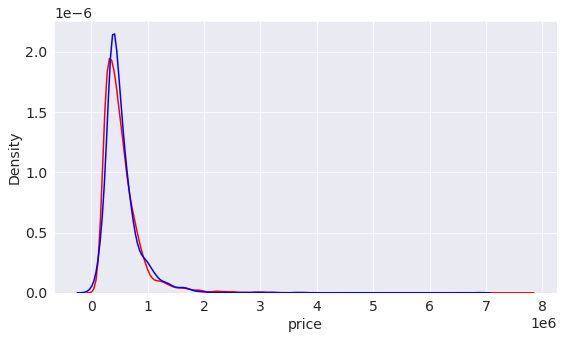

In [ ]:
ax1=sns.distplot(data_raw_df['price'],hist=False,color='r',label="actual")
sns.distplot(a,hist=False , color='b',label='fitted',ax=ax1)

## Inferences and Conclusion


#### From the following we find out the data model development for data refinement where we plot grraph of density and price of the houses which will be helpful to predicate the increase in the house rent depending upon the given requirements like floors, sqft of bathroom, view, etc. based on the choices of the buyers.

## References and Future Work

**TODO** - These are the following links and blogs which helped me in the project.

--1.https://www.geeksforgeeks.org/house-price-prediction-using-machine-learning-in-python/

--2.https://towardsdatascience.com/predicting-house-prices-with-machine-learning-62d5bcd0d68f

--3.https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

--4.https://www.vshsolutions.com/blogs/house-price-prediction-using-regression-algorithms/#:~:text=Regression%20algorithms%2C%20on%20the%20other,is%20expected%20to%20score%20etc.

--5.https://www.section.io/engineering-education/house-price-prediction/

--6.https://www.rocketmortgage.com/learn/home-value#:~:text=One%20of%20the%20most%20accurate,you're%20preparing%20to%20sell.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shreyash-amrutam/house-sales-in-king-county" on https://jovian.com


ApiError: File upload failed: (HTTP 400) Uploaded notebook file seems to be corrupt.